In [3]:
# Classification of missing value 
# -> Missing completely at random : Data missing is independent of observed and unobeserved data
# -> Missing at RAndom : Missing Data is dependent on observed data
# -> Missing not at Random : Missing value depends on the value of missing data itself.
# -> Treatment of missing values

In [7]:
# No Hard and fast Rules for Treatmeant of missing data.
# For analysis  and ML prediction it is important to deal with missing value
# If :
#     data is huge and mssing value is 1 % of total data Then drop the missing value.
# else:
#     if(Categorical):
#            Impute with mode
#        if(Continious):
#            Impute with mean and mode.
#                 if(outlier treatment done):
#                       Can impute with mean and mode 
#                 else:
#                       Impute with median
# Can also impute missing value which is not possible.

In [27]:
import numpy as np 
import seaborn as sns
import pandas as pd

In [13]:
data={
    "A" :[1,2,100 , 4 , 5],
    "B" : [3 , np.nan , 7 ,8 ,9],
    "C": [ np.nan , 12 , 13 , 14 , 15],
    "D": [16,17,18,np.nan,20]
}

In [49]:
df = pd.DataFrame(data)
print("Original DataFrame")
df

Original DataFrame


,A,B,C,D
0,1,3.0,NaN,16.0
1,2,NaN,12.0,17.0
2,100,7.0,13.0,18.0
3,4,8.0,14.0,NaN
4,5,9.0,15.0,20.0


In [51]:
df.isnull().sum()

A    0
B    1
C    1
D    1
dtype: int64

In [53]:
df.dropna(axis=1)

,A
0,1
1,2
2,100
3,4
4,5


In [55]:
df.dropna()

,A,B,C,D
2,100,7.0,13.0,18.0
4,5,9.0,15.0,20.0


In [61]:
df['B'].fillna(df['B'].mean())

0    3.00
1    6.75
2    7.00
3    8.00
4    9.00
Name: B, dtype: float64

In [63]:
df['B'].fillna(df['B'].median())

0    3.0
1    7.5
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [65]:
df['B'].fillna(0)

0    3.0
1    0.0
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [69]:
df=sns.load_dataset('titanic')

In [71]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [73]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

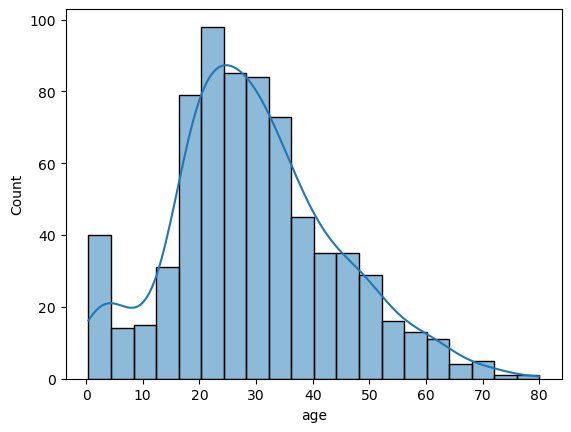

In [75]:
sns.histplot(df.age ,kde=True)

In [79]:
# Since the above is a Normal dataset hence it wont have much outliers and we can replace/impute the data with the mean .

In [139]:
df['MeanImputation'] = df['age'].fillna(df['age'].mean())

In [127]:
df['MeanImputation'].isnull().sum()

0

In [129]:
df['MeanImputation']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: MeanImputation, Length: 891, dtype: float64

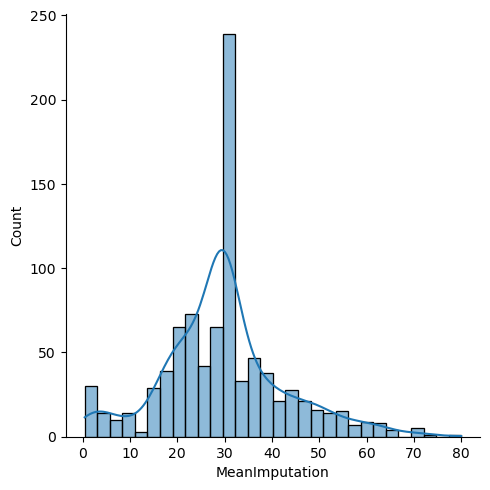

In [133]:
sns.displot(df['MeanImputation'],kde=True)

In [137]:
df['MedianImputation'] = df['age'].fillna(df['age'].median())

In [141]:
df['MedianImputation'].isnull().sum()

0

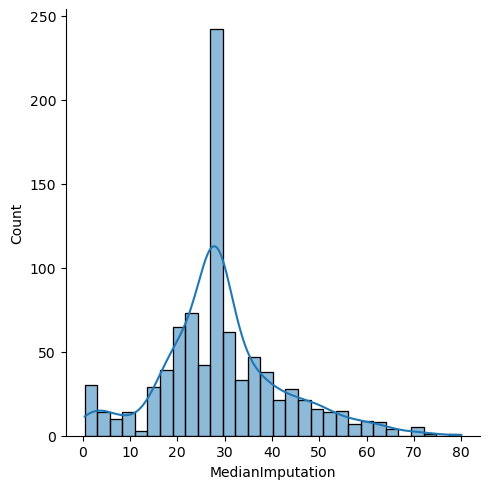

In [145]:
sns.displot(df['MedianImputation'] , kde=True)